In [1]:
!hostname

n96.clstr


In [2]:
import xarray as xr
import os
import glob
import geopandas as gpd
import pandas as pd
import numpy as np
import re
from scipy.stats import linregress
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import regionmask

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import seaborn as sns
from scipy.stats import linregress
from scipy.stats import pearsonr, spearmanr

Calling Precip... 
-

In [3]:
path='/import/c1/DYNDOWN/phutton5/ROS/FNSB/FNSB_netcdf_files/ROS_Precip/'
pattern=f'ROS_P*.nc'
file_list = sorted(glob.glob(os.path.join(path, pattern)))
data = xr.open_mfdataset(file_list, combine='by_coords',engine='netcdf4')

start_year = '1950-1951'
data = data.sel(season=data.season >= start_year)
seasons=data['season']
average_ROS_tally=np.nanmean(data['ros_counts'],axis=(1,2))

rain_sum=data['rain_sum']
rain_sum_avg=np.mean(rain_sum,axis=(1,2))
rain_ros_avg=data['rain_ros_avg']
rain_ros_avg=np.mean(rain_ros_avg,axis=(1,2))
rain_ros_sum=data['rain_ros_sum']
rain_ros_sum=np.mean(rain_ros_sum,axis=(1,2))

rain_sum_fnsb=[]
for i in range(len(data['rain_sum'].season)):
    avg=data['rain_sum'].isel(season=i).mean().compute().item()
    #avg = (avg - 273.15) * 9/5 + 32
    rain_sum_fnsb.append(avg)
print(rain_sum_fnsb)

rain_sum_ROS_fnsb=[]
for i in range(len(data['rain_ros_sum'].season)):
    avg=data['rain_ros_sum'].isel(season=i).mean().compute().item()
    rain_sum_ROS_fnsb.append(avg)
print(rain_sum_ROS_fnsb)

ros_avg_rain = np.mean(data['rain_ros_avg'],axis=(1,2))

[0.011356600560247898, 0.02237807959318161, 0.020322280004620552, 0.01274876482784748, 0.03306262567639351, 0.0047749909572303295, 0.07649489492177963, 0.04012715071439743, 0.0044593820348382, 0.018588632345199585, 0.024269621819257736, 0.07754270732402802, 0.20528900623321533, 0.025813743472099304, 0.07243597507476807, 0.013078109361231327, 0.0199687872081995, 0.1815306693315506, 0.020694615319371223, 0.03461587429046631, 0.08063007146120071, 0.025618962943553925, 0.033112533390522, 0.005293040536344051, 0.012338658794760704, 0.035052042454481125, 0.08290060609579086, 0.013391224667429924, 0.029104024171829224, 0.10849703103303909, 0.03419908508658409, 0.04440384358167648, 0.02091294154524803, 0.021119657903909683, 0.04191945865750313, 0.058176688849925995, 0.06179330125451088, 0.011041778139770031, 0.05764307454228401, 0.0272569190710783, 0.06463170051574707, 0.013642125762999058, 0.033878885209560394, 0.042278941720724106, 0.01357797160744667, 0.014977913349866867, 0.010122573003172

In [4]:
ros_hourly_totals_climatology = []
for i in range(len(data['ros_tally'].season)):
    val = data['ros_tally'].isel(season=i).sum().compute().item()
    ros_hourly_totals_climatology.append(val)

n_pixels_per_season = []

for i in range(len(data['ros_tally'].season)):
    # Get 2D field for the season
    ros_this_season = data['ros_tally'].isel(season=i)
    
    # Create a boolean mask of where ROS occurred (value > 0)
    grid_with_ros = ros_this_season > 0
    
    # Count how many grid cells had ROS
    n_pixels = grid_with_ros.sum().compute().item()
    n_pixels_per_season.append(n_pixels)

ros_hours_normalized = [total / n if n > 0 else np.nan 
                        for total, n in zip(ros_hourly_totals_climatology, n_pixels_per_season)]

Calling Temp...
-

In [5]:
path='/center1/DYNDOWN/phutton5/ROS/FNSB/FNSB_netcdf_files/ROS_Tlevels/'
pattern=f'ROS_Tl*.nc'
file_list = sorted(glob.glob(os.path.join(path, pattern)))
data = xr.open_mfdataset(file_list, combine='by_coords',engine='netcdf4')
seasons=data['season']

start_year = '1950-1951'
data = data.sel(season=data.season >= start_year)
T2_ros_avg=data['T2_ros_avg']
T2_ros_avg=np.mean(T2_ros_avg,axis=(1,2))
T2_avg=data['T2_avg']
T2_avg=np.mean(data['T2_avg'],axis=(1,2))

T2_avg_fnsb=[]
for i in range(len(data['T2_avg'].season)):
    avg=data['T2_avg'].isel(season=i).mean().compute().item()
    #avg = (avg - 273.15) * 9/5 + 32
    T2_avg_fnsb.append(avg)
print(T2_avg_fnsb)

T2_avg_ROS_fnsb=[]
for i in range(len(data['T2_ros_avg'].season)):
    avg=data['T2_ros_avg'].isel(season=i).mean().compute().item()
    #avg = (avg - 273.15) * 9/5 + 32
    T2_avg_ROS_fnsb.append(avg)
print(T2_avg_ROS_fnsb)

T2_avg_ROS_fnsb_C=np.array(T2_avg_ROS_fnsb)-273.15
T2_avg_fnsb_C=np.array(T2_avg_fnsb)-273.15


avg_temp_850=np.mean(data['temp_levels_avg'].sel(interp_level=850),axis=(1,2))
avg_temp_925=np.mean(data['temp_levels_avg'].sel(interp_level=925),axis=(1,2))
avg_temp_950=np.mean(data['temp_levels_avg'].sel(interp_level=950),axis=(1,2))
avg_temp_850_C=avg_temp_850-273.15
avg_temp_925_C=avg_temp_925-273.15
avg_temp_950_C=avg_temp_950-273.15

avg_ros_temp_850=np.mean(data['temp_levels_ros_avg'].sel(interp_level=850),axis=(1,2))
avg_ros_temp_925=np.mean(data['temp_levels_ros_avg'].sel(interp_level=925),axis=(1,2))
avg_ros_temp_950=np.mean(data['temp_levels_ros_avg'].sel(interp_level=950),axis=(1,2))
avg_ros_temp_850_C=avg_ros_temp_850-273.15
avg_ros_temp_925_C=avg_ros_temp_925-273.15
avg_ros_temp_950_C=avg_ros_temp_950-273.15

[253.6638946533203, 256.2445068359375, 258.71893310546875, 256.2822265625, 257.35760498046875, 252.78968811035156, 256.491943359375, 259.8514709472656, 255.8328399658203, 258.52606201171875, 258.4056091308594, 255.4522705078125, 259.1460876464844, 256.60601806640625, 255.94979858398438, 255.0322723388672, 255.7603302001953, 258.278076171875, 255.39747619628906, 260.37982177734375, 253.1292266845703, 253.0487518310547, 256.72576904296875, 254.90675354003906, 255.6294708251953, 255.15756225585938, 262.10626220703125, 258.4698791503906, 257.752197265625, 259.2404479980469, 261.215576171875, 256.3980712890625, 257.54888916015625, 258.83929443359375, 258.83319091796875, 259.5689392089844, 260.4145812988281, 260.30523681640625, 256.3272705078125, 255.6563262939453, 256.0351257324219, 257.611328125, 259.241943359375, 258.833984375, 256.27154541015625, 257.2996520996094, 256.60821533203125, 259.86328125, 255.9529266357422, 258.1968994140625, 262.60406494140625, 259.00823974609375, 262.36676025

In [6]:
data

<xarray.Dataset> Size: 785MB
Dimensions:              (season: 74, south_north: 450, west_east: 420,
                          interp_level: 3)
Coordinates:
  * season               (season) <U9 3kB '1950-1951' ... '2023-2024'
    XLAT                 (south_north, west_east) float32 756kB dask.array<chunksize=(450, 420), meta=np.ndarray>
    XLONG                (south_north, west_east) float32 756kB dask.array<chunksize=(450, 420), meta=np.ndarray>
  * interp_level         (interp_level) float64 24B 850.0 925.0 950.0
Dimensions without coordinates: south_north, west_east
Data variables:
    ros_tally            (season, south_north, west_east) int64 112MB dask.array<chunksize=(1, 450, 420), meta=np.ndarray>
    ros_counts           (season, south_north, west_east) int64 112MB dask.array<chunksize=(1, 450, 420), meta=np.ndarray>
    ros_days_count       (season, south_north, west_east) int64 112MB dask.array<chunksize=(1, 450, 420), meta=np.ndarray>
    T2_avg               (season, south_north, west_east) float32 56MB dask.array<chunksize=(1, 450, 420), meta=np.ndarray>
    T2_ros_avg           (season, south_north, west_east) float32 56MB dask.array<chunksize=(1, 450, 420), meta=np.ndarray>
    temp_levels_avg      (season, interp_level, south_north, west_east) float32 168MB dask.array<chunksize=(1, 3, 450, 420), meta=np.ndarray>
    temp_levels_ros_avg  (season, interp_level, south_north, west_east) float32 168MB dask.array<chunksize=(1, 3, 450, 420), meta=np.ndarray>

In [7]:
shapefile_path = "/center1/DYNDOWN/phutton5/ROS/boundaries/Alaska_Borough_and_Census_Area_Boundaries.shp"
borough_boundaries = gpd.read_file(shapefile_path)
borough_boundaries = borough_boundaries.set_crs(epsg=3338)
borough_boundaries = borough_boundaries.to_crs(epsg=4326)
FNSB_boundary = borough_boundaries[borough_boundaries['CommunityN'] == 'Fairbanks North Star Borough']
FNSB_geom = FNSB_boundary.geometry.iloc[0] 
FNSB_coords = []
FNSB_coords.extend(list(FNSB_geom.exterior.coords))
FNSB_coords = np.array(FNSB_coords)  
FNSB_coords = pd.DataFrame({
    "lon": FNSB_coords[:, 0],
    "lat": FNSB_coords[:, 1]
})

Fairbanks_lat=(64.84)
Fairbanks_lon=(-147.72)
lat=data['XLAT']
lon=data['XLONG']

In [10]:
os.chdir("/import/beegfs/CMIP6/wrf_era5")
path='/import/beegfs/CMIP6/wrf_era5'
geo_em_path = "/geo_em.d02.nc"
geo = xr.open_dataset(path+geo_em_path)

mask = regionmask.mask_geopandas(FNSB_boundary, lon, lat)

elevation=geo['HGT_M']
elevation = elevation.where(~np.isnan(mask))

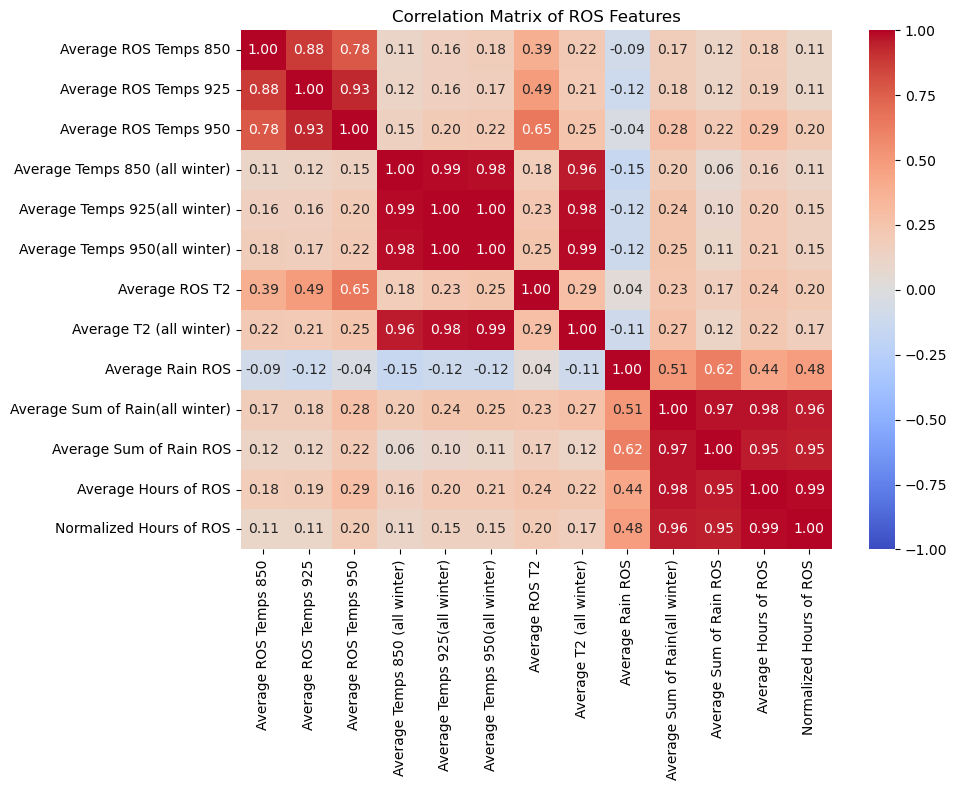

In [12]:
import seaborn as sns

dfcorrelation = pd.DataFrame({
    'Average ROS Temps 850': np.ravel(avg_ros_temp_850_C),
    'Average ROS Temps 925': np.ravel(avg_ros_temp_925_C),
    'Average ROS Temps 950': np.ravel(avg_ros_temp_950_C),
    'Average Temps 850 (all winter)': np.ravel(avg_temp_850_C),
    'Average Temps 925(all winter)': np.ravel(avg_temp_925_C),
    'Average Temps 950(all winter)': np.ravel(avg_temp_950_C),
    'Average ROS T2': np.ravel(T2_ros_avg),
    'Average T2 (all winter)': np.ravel((T2_avg - 273.15)),
    'Average Rain ROS': np.ravel(ros_avg_rain),
    'Average Sum of Rain(all winter)': np.ravel(rain_sum_avg),
    'Average Sum of Rain ROS': np.ravel(rain_ros_sum),
    'Average Rain ROS': np.ravel(rain_ros_avg),
    'Average Hours of ROS': np.ravel(average_ROS_tally),
    'Normalized Hours of ROS':ros_hours_normalized
})
corr = dfcorrelation.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of ROS Features")
plt.tight_layout()
plt.show()


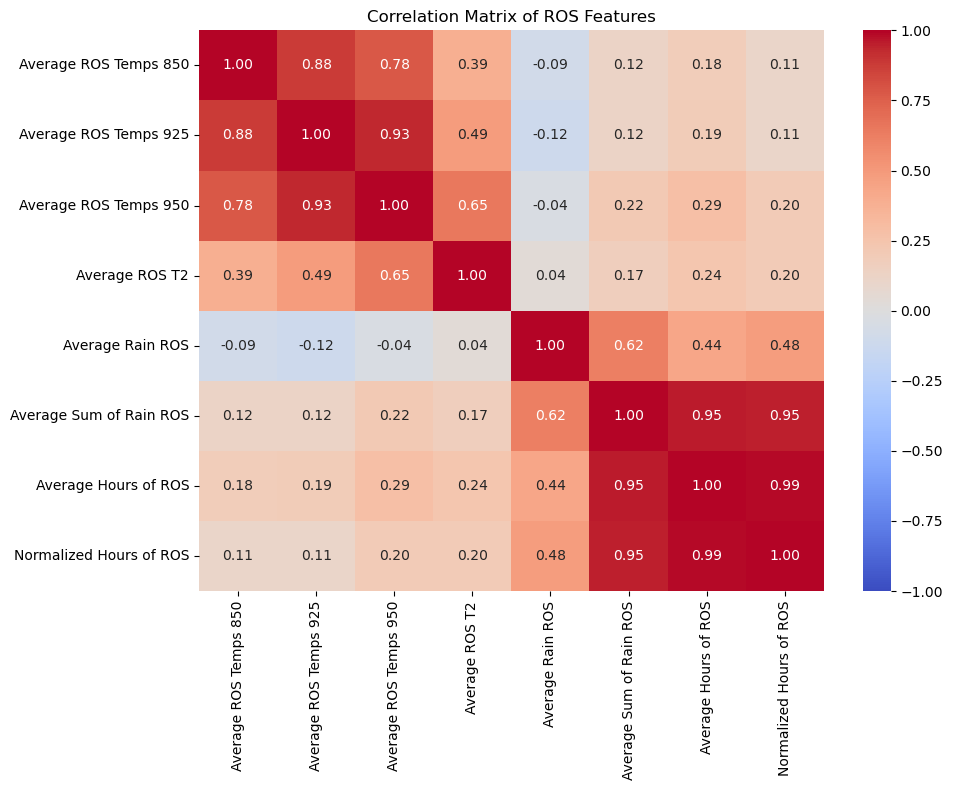

In [110]:
import seaborn as sns
mask = ~np.isnan(np.ravel(average_ROS_tally))
dfcorrelation = pd.DataFrame({
    'Average ROS Temps 850': np.ravel(avg_ros_temp_850_C)[mask],
    'Average ROS Temps 925': np.ravel(avg_ros_temp_925_C)[mask],
    'Average ROS Temps 950': np.ravel(avg_ros_temp_950_C)[mask],
    'Average ROS T2': np.ravel(T2_ros_avg)[mask],
    'Average Rain ROS': np.ravel(ros_avg_rain)[mask],
    'Average Sum of Rain ROS': np.ravel(rain_ros_sum)[mask],
    'Average Rain ROS': np.ravel(rain_ros_avg)[mask],
    'Average Hours of ROS': np.ravel(average_ROS_tally)[mask],
    'Normalized Hours of ROS':ros_hours_normalized
})
corr = dfcorrelation.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of ROS Features")
plt.tight_layout()
plt.show()


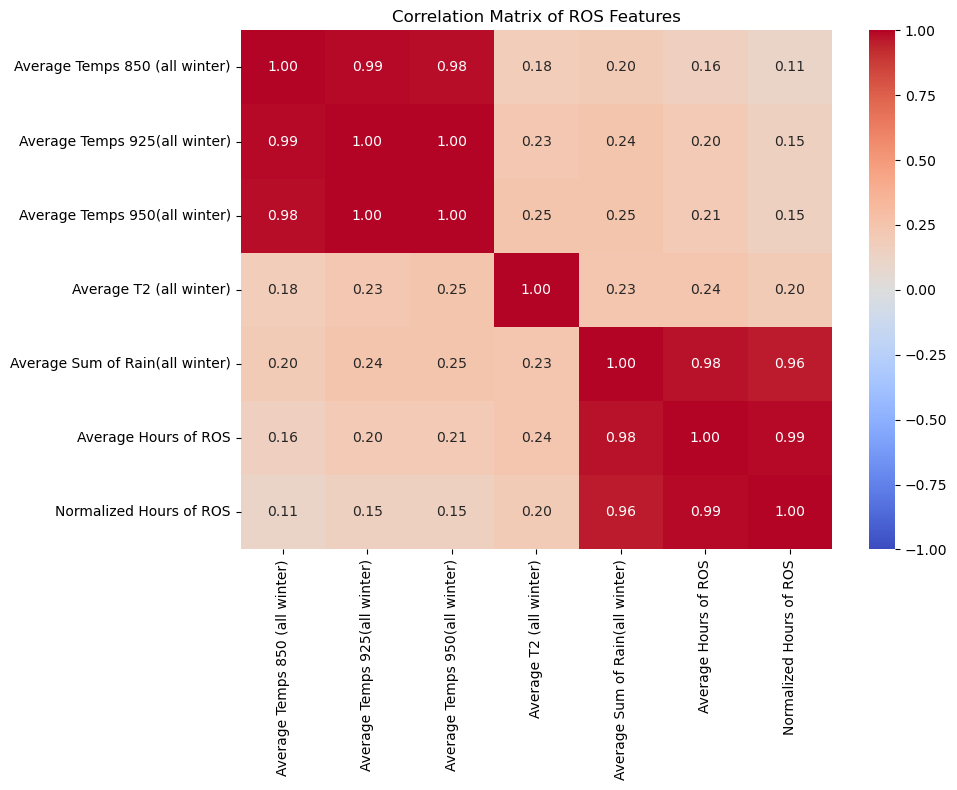

In [109]:
import seaborn as sns
mask = ~np.isnan(np.ravel(average_ROS_tally))
dfcorrelation = pd.DataFrame({
    'Average Temps 850 (all winter)': np.ravel(avg_temp_850_C)[mask],
    'Average Temps 925(all winter)': np.ravel(avg_temp_925_C)[mask],
    'Average Temps 950(all winter)': np.ravel(avg_temp_950_C)[mask],
    'Average T2 (all winter)': np.ravel(T2_ros_avg)[mask],
    'Average Sum of Rain(all winter)': np.ravel(rain_sum_avg)[mask],
    'Average Hours of ROS': np.ravel(average_ROS_tally)[mask],
    'Normalized Hours of ROS':ros_hours_normalized
})
corr = dfcorrelation.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of ROS Features")
plt.tight_layout()
plt.show()

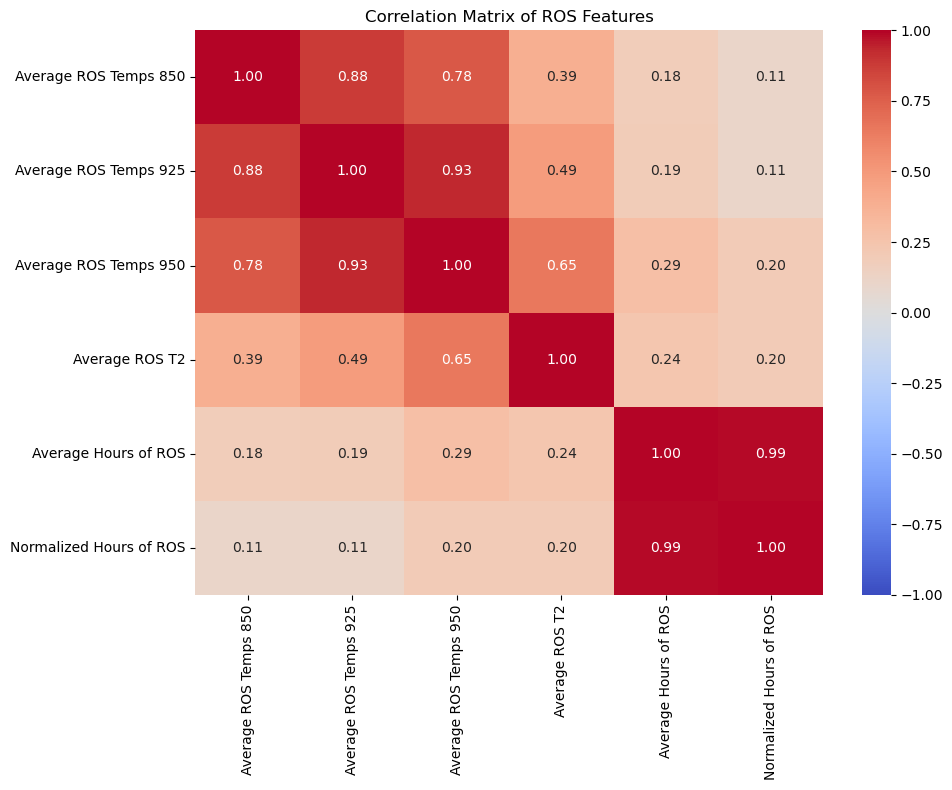

In [113]:
import seaborn as sns
mask = ~np.isnan(np.ravel(average_ROS_tally))
dfcorrelation = pd.DataFrame({
    'Average ROS Temps 850': np.ravel(avg_ros_temp_850_C),
    'Average ROS Temps 925': np.ravel(avg_ros_temp_925_C),
    'Average ROS Temps 950': np.ravel(avg_ros_temp_950_C),
    'Average ROS T2': np.ravel(T2_ros_avg),
    'Average Hours of ROS': np.ravel(average_ROS_tally),
    'Normalized Hours of ROS':ros_hours_normalized
})
corr = dfcorrelation.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of ROS Features")
plt.tight_layout()
plt.show()


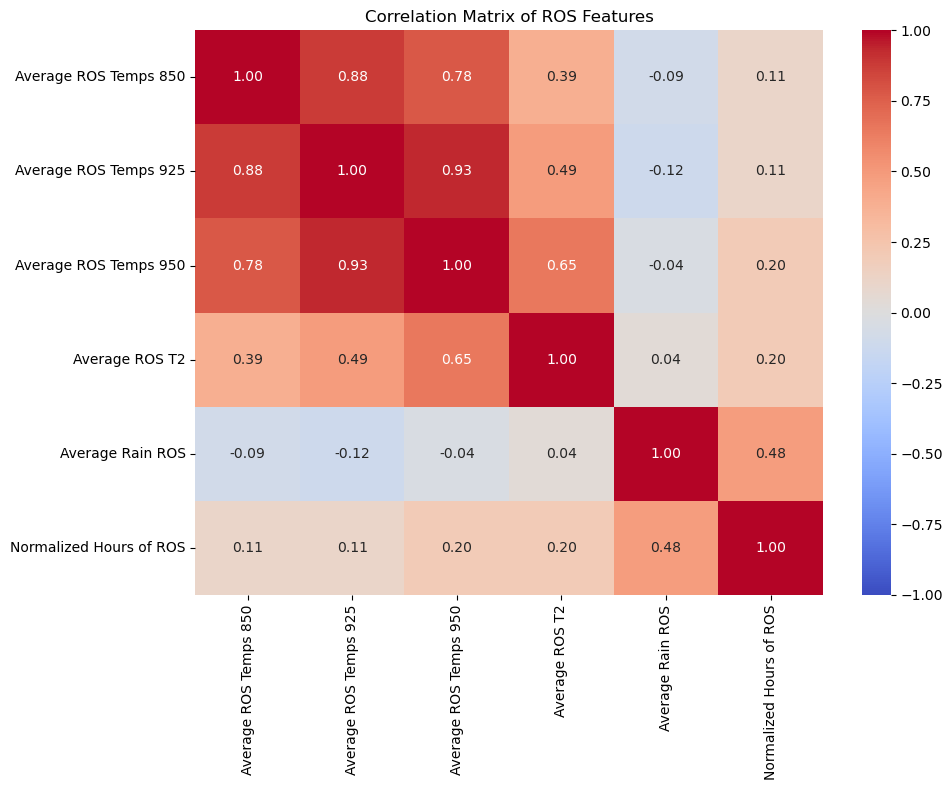

In [107]:
import seaborn as sns
dfcorrelation = pd.DataFrame({
    'Average ROS Temps 850': np.ravel(avg_ros_temp_850_C),
    'Average ROS Temps 925': np.ravel(avg_ros_temp_925_C),
    'Average ROS Temps 950': np.ravel(avg_ros_temp_950_C),
    'Average ROS T2': np.ravel(T2_ros_avg),
    'Average Rain ROS': np.ravel(rain_ros_avg),
    'Normalized Hours of ROS':ros_hours_normalized
})
corr = dfcorrelation.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of ROS Features")
plt.tight_layout()
plt.show()

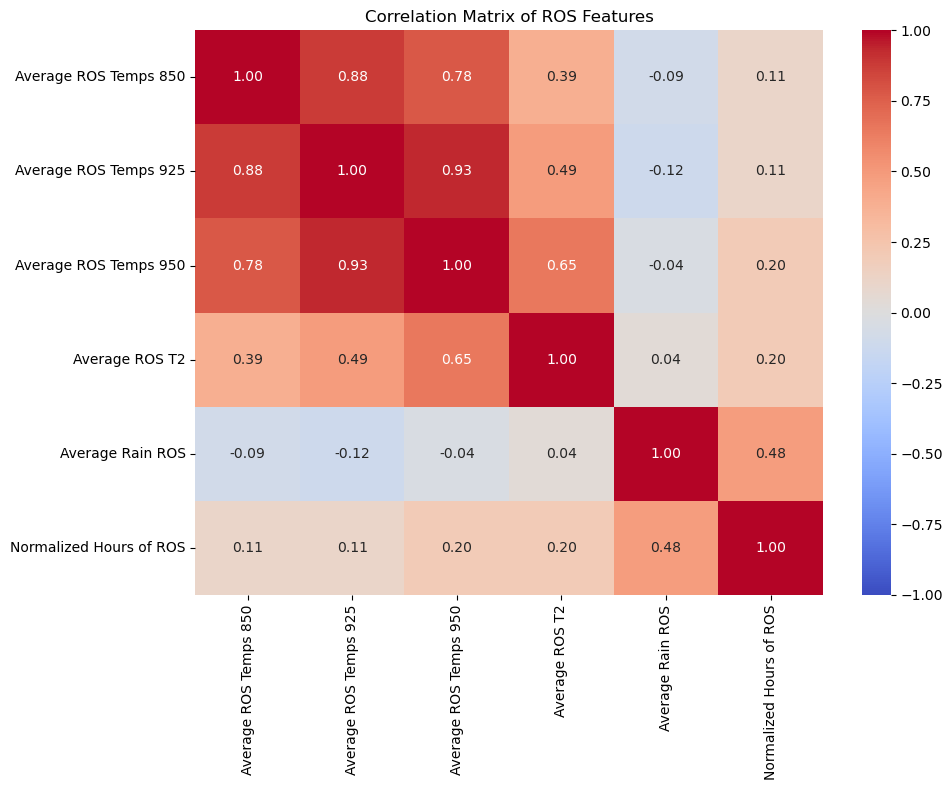

In [112]:
import seaborn as sns
dfcorrelation = pd.DataFrame({
    'Average ROS Temps 850': np.ravel(avg_ros_temp_850_C),
    'Average ROS Temps 925': np.ravel(avg_ros_temp_925_C),
    'Average ROS Temps 950': np.ravel(avg_ros_temp_950_C),
    'Average ROS T2': np.ravel(T2_ros_avg),
    'Average Rain ROS': np.ravel(rain_ros_avg),
    'Normalized Hours of ROS':ros_hours_normalized
})
corr = dfcorrelation.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of ROS Features")
plt.tight_layout()
plt.show()

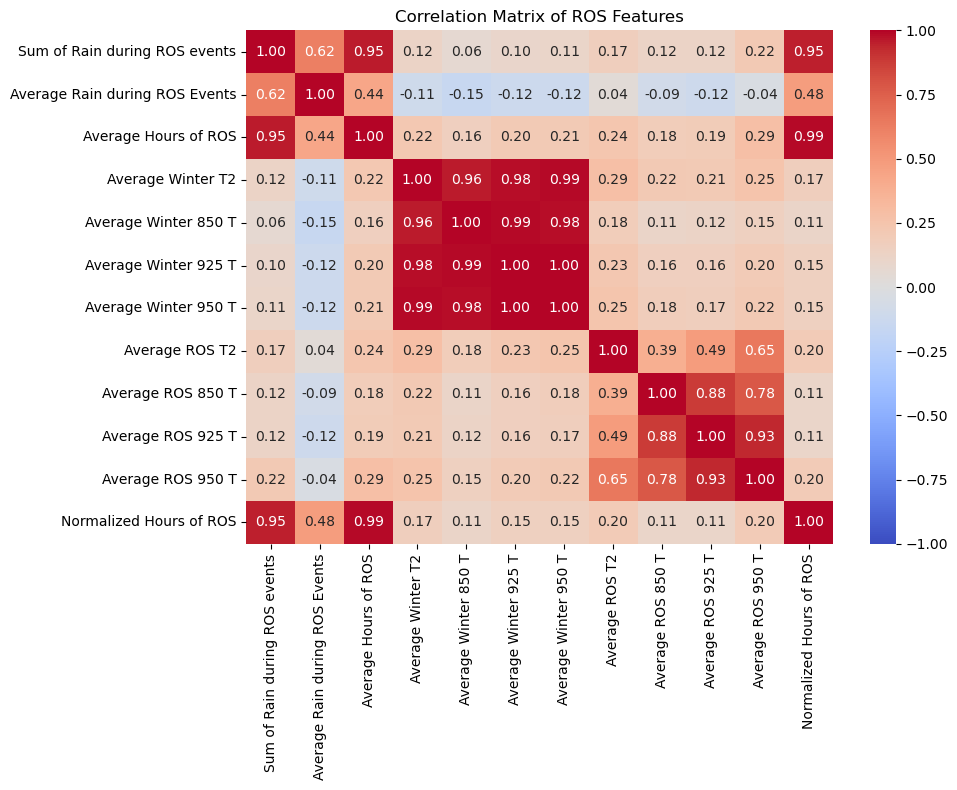

In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

mask = ~np.isnan(np.ravel(average_ROS_tally))

df_corr = pd.DataFrame({
    'Sum of Rain during ROS events': np.ravel(rain_ros_sum)[mask],
    'Average Rain during ROS Events': np.ravel(rain_ros_avg)[mask],
    'Average Hours of ROS': np.ravel(average_ROS_tally)[mask],
    'Average Winter T2': np.ravel(T2_avg),
    "Average Winter 850 T": np.ravel(avg_temp_850_C)[mask],
    "Average Winter 925 T": np.ravel(avg_temp_925_C)[mask],
    "Average Winter 950 T": np.ravel(avg_temp_950_C)[mask],
    'Average ROS T2': np.ravel(T2_ros_avg)[mask],
    "Average ROS 850 T": np.ravel(avg_ros_temp_850_C)[mask],
    "Average ROS 925 T": np.ravel(avg_ros_temp_925_C)[mask],
    "Average ROS 950 T": np.ravel(avg_ros_temp_950_C)[mask],
    'Normalized Hours of ROS':ros_hours_normalized
})

corr = df_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of ROS Features")
plt.tight_layout()
plt.show()
